In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Підготовка тренувального датасету

In [ ]:
train = '/content/drive/MyDrive/data/train/train.csv'

df_train = pd.read_csv(train)

df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import pandas as pd
from transformers import BertTokenizer

# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для підрахунку кількості токенів у тексті
def count_tokens(text):
    punctuation_to_remove = string.punctuation.replace(".", "").replace(",", "")

    # Видаляємо знаки пунктуації
    text = re.sub(f"[{re.escape(punctuation_to_remove)}]", " ", text)

   # Видалення повторюваних однакових літер (наприклад, AAAAAAA)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # Заміна 3 або більше однакових букв

    # Видалення повторюваних шаблонів, де кожна друга літера інша (наприклад, XAXAXA)
    text = re.sub(r'(.)(.)\1\2{2,}', r'\1\2', text)  # Заміна патернів повторів XAXAXA, XAXAXXAXX

    # Повністю видаляємо надмірний сміх (ahahahah, MUAHAHAHA)
    text = re.sub(r'(ha|ah|mu|ua|HA|AH|MU|UA){2,}', '', text)

    # Видалення повторюваних слів (наприклад, LOL LOL LOL)
    text = re.sub(r'\b(\w+)\b(?:\s+\1\b){2,}', r'\1', text)  # Заміна, якщо слово повторюється 3 і більше разів

    tokens = tokenizer.encode(text, add_special_tokens=False)  # Токенізуємо текст
    return len(tokens)  # Повертаємо кількість токенів

# Підрахунок кількості токенів для кожного коментаря
df_train['token_count'] = df_train['comment_text'].apply(count_tokens)

# Виведення результатів
print(df_train[['comment_text', 'token_count']].head())


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors


                                        comment_text  token_count
0  Explanation\nWhy the edits made under my usern...           62
1  D'aww! He matches this background colour I'm s...           25
2  Hey man, I'm really not trying to edit war. It...           50
3  "\nMore\nI can't make any real suggestions on ...          126
4  You, sir, are my hero. Any chance you remember...           17


In [23]:
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,token_count
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,83.601669
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,124.881548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2273.000000


In [24]:
import pandas as pd
from transformers import BertTokenizer


# Сортуємо датасет за кількістю токенів у спадному порядку і виводимо топ 30 значень
top_30 = df_train.sort_values(by='token_count', ascending=False).head(30)

# Виведення результату
print(top_30[['comment_text', 'token_count']])


                                             comment_text  token_count
93952   wiki NOOBS wiki NOOBS wiki NOOBS wiki NOOBS wi...         2273
4712    do go fuck off bastard\nDo Yyou Have a life?\n...         2087
125928  {{unblock| Oxymoron is a moron in an Oxymoron ...         1993
76598   DIE FAG DIE FAG DIE FAG DIE FAG DIE FAG DIE FA...         1875
61793   OH NOES OH NOES OH NOES OH NOES OH NOES OH NOE...         1875
128573  teabag! \n\nTeabag, teabag, teabag, teabag, te...         1862
147806  Just To Let You Know. You have no life.\nI hat...         1807
15309   Hanibal911You're a bastard Pro-Assad.Hanibal91...         1752
10359   "\n\n Translated text - if anyone wants to sor...         1701
96267   BOOTSTOOTS IS A FRIGGEN GAYFAG LOLOOOLBOOTSTOO...         1668
22378   I fuck niggas! I fuck niggas! I fuck niggas! I...         1668
156437  HUGE FAGGOT HUGE FAGGOT HUGE FAGGOT HUGE FAGGO...         1667
75165   IN THE NAME OF YTMND!IN THE NAME OF YTMND!IN T...         1667
13052 

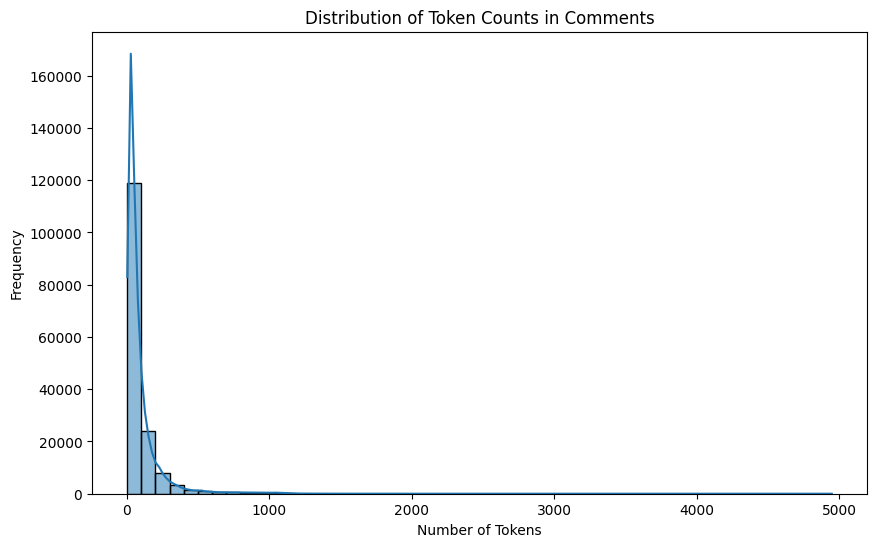

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Побудова діаграми за допомогою Seaborn
plt.figure(figsize=(10, 6))  # Розмір графіка
sns.histplot(df_train['token_count'], bins=50, kde=True)  # Гістограма кількості токенів
plt.title('Distribution of Token Counts in Comments')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Цільові мітки
target_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
y = df_train[target_labels].values


In [ ]:
from transformers import BertTokenizer

# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Токенізація тексту
X = tokenizer(
    list(df_train['comment_text']),
    max_length=128,  # Максимальна довжина тексту, можна змінювати
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)


Скрипт жпт

In [ ]:
!pip install transformers rake-nltk nltk sumy


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 58.8 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=fc0a3cb8cfd8d922c8a0684ae278d1338442ece606df41d65a356b13f098d45d
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=50cc4b4c392302104aa79014509d245345058a7f1be6665d21833d51a0282c33
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [ ]:
import re
import string
from transformers import BertTokenizer
from rake_nltk import Rake
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer as SumyTokenizer
from sumy.summarizers.lsa import LsaSummarizer
import nltk

# Завантаження стоп-слів для RAKE
nltk.download('stopwords')

# Ініціалізація токенайзера BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Функція для видалення непотрібних символів
def clean_text(text):
    punctuation_to_remove = string.punctuation.replace(".", "").replace(",", "")

    # Видаляємо знаки пунктуації
    text = re.sub(f"[{re.escape(punctuation_to_remove)}]", " ", text)
    # Видалення повторюваних однакових літер (наприклад, AAAAAAA)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # Заміна 3 або більше однакових букв

    # Видалення повторюваних шаблонів, де кожна друга літера інша (наприклад, XAXAXA)
    text = re.sub(r'(.)(.)\1\2{2,}', r'\1\2', text)  # Заміна патернів повторів XAXAXA, XAXAXXAXX, тощо

    return text

# Функція для виділення ключових речень з тексту за допомогою sumy
def extract_important_sentences(text, sentences_count=5):
    parser = PlaintextParser.from_string(text, SumyTokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, sentences_count)

    return ' '.join([str(sentence) for sentence in summary])

# Функція для виділення ключових фраз з тексту за допомогою RAKE
def extract_key_phrases(text, num_phrases=5):
    r = Rake()
    r.extract_keywords_from_text(text)
    return ' '.join(r.get_ranked_phrases()[:num_phrases])

# Функція для скорочення тексту до 512 токенів
def reduce_to_512_tokens(text):
    # Токенізуємо текст і обрізаємо до max_length=512
    tokens = tokenizer.encode(text, max_length=512, truncation=True)
    return tokenizer.decode(tokens, skip_special_tokens=True)

# Основна функція для комбінування методів і скорочення тексту
def process_text(text, sentences_count=5, num_phrases=5):
    # Видаляємо непотрібні символи
    cleaned_text = clean_text(text)

    # Токенізуємо очищений текст і перевіряємо кількість токенів
    tokens = tokenizer.encode(cleaned_text)

    # Якщо текст вже має менше ніж 512 токенів, просто повертаємо очищений текст
    if len(tokens) <= 512:
        return cleaned_text

    # Якщо текст більше 512 токенів, скорочуємо його
    # Виділяємо ключові речення
    important_sentences = extract_important_sentences(cleaned_text, sentences_count=sentences_count)

    # Виділяємо ключові фрази
    key_phrases = extract_key_phrases(cleaned_text, num_phrases=num_phrases)

    # Об'єднуємо ключові речення та фрази
    combined_text = important_sentences + ' ' + key_phrases

    # Скорочуємо текст до 512 токенів
    reduced_text = reduce_to_512_tokens(combined_text)

    return reduced_text

# Тестуємо функцію на прикладі одного коментаря
test_text = """This is an example of a very long comment that contains a lot of unnecessary details.
The goal is to reduce the length of this text to fit within 512 tokens for BERT.
By using techniques like sentence extraction and key phrase extraction, we can significantly shorten this text
while retaining its most important parts. The RAKE algorithm will help extract important keywords,
and the summarization method will help extract important sentences from this comment.
We need to ensure that the final version of the text does not exceed the token limit of 512."""

# Застосовуємо функцію
processed_text = process_text(test_text)

# Виведення обробленого тексту
print("Original Text:\n", test_text)
print("\nProcessed Text:\n", processed_text)

# Перевіряємо кількість токенів у скороченому тексті
tokens_count = len(tokenizer.encode(processed_text))
print("\nToken Count:", tokens_count)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Original Text:
 This is an example of a very long comment that contains a lot of unnecessary details. 
The goal is to reduce the length of this text to fit within 512 tokens for BERT. 
By using techniques like sentence extraction and key phrase extraction, we can significantly shorten this text 
while retaining its most important parts. The RAKE algorithm will help extract important keywords, 
and the summarization method will help extract important sentences from this comment. 
We need to ensure that the final version of the text does not exceed the token limit of 512.

Processed Text:
 This is an example of a very long comment that contains a lot of unnecessary details. 
The goal is to reduce the length of this text to fit within 512 tokens for BERT. 
By using techniques like sentence extraction and key phrase extraction, we can significantly shorten this text 
while retaining its most important parts. The RAKE algorithm will help extract important keywords, 
and the summarization me

# скрипт kлауд

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqGeneration
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import numpy as np

class TextSummarizer:
    def __init__(self):
        # Завантажуємо необхідні ресурси NLTK
        nltk.download('punkt')
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('ukrainian') + stopwords.words('english'))

    def preprocess_text(self, text):
        # Розбиваємо текст на речення
        sentences = sent_tokenize(text)

        # Токенізація та видалення стоп-слів
        word_tokens = []
        for sentence in sentences:
            words = word_tokenize(sentence.lower())
            words = [w for w in words if w.isalnum() and w not in self.stop_words]
            word_tokens.extend(words)

        return sentences, word_tokens

    def get_sentence_scores(self, sentences, word_tokens):
        # Створюємо частотний розподіл слів
        freq_dist = FreqDist(word_tokens)

        # Обчислюємо оцінки для кожного речення
        sentence_scores = {}
        for i, sentence in enumerate(sentences):
            words = word_tokenize(sentence.lower())
            words = [w for w in words if w.isalnum()]
            score = sum([freq_dist[word] for word in words if word not in self.stop_words])
            sentence_scores[i] = score / len(words) if words else 0

        return sentence_scores

    def summarize(self, text, target_length=512):
        # Попередня обробка тексту
        sentences, word_tokens = self.preprocess_text(text)

        # Отримуємо оцінки речень
        sentence_scores = self.get_sentence_scores(sentences, word_tokens)

        # Сортуємо речення за оцінками
        sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)

        # Вибираємо найважливіші речення
        selected_sentences = []
        current_length = 0

        for sentence_idx, _ in sorted_sentences:
            sentence = sentences[sentence_idx]
            sentence_length = len(sentence)

            if current_length + sentence_length <= target_length:
                selected_sentences.append((sentence_idx, sentence))
                current_length += sentence_length
            else:
                break

        # Відновлюємо оригінальний порядок речень
        summary = ' '.join([sentence for _, sentence in sorted(selected_sentences)])

        return summary

# Приклад використання
summarizer = TextSummarizer()

# Текст для скорочення
text = """Ваш довгий текст тут..."""

# Отримання скороченої версії
summary = summarizer.summarize(text, target_length=512)
print(f"Довжина скороченого тексту: {len(summary)}")
print("\nСкорочений текст:")
print(summary)

In [ ]:
from transformers import BertTokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re

class SmartBertTruncator:
    def __init__(self, model_name='bert-base-multilingual-cased'):
        # Ініціалізація необхідних компонентів
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        nltk.download('punkt')
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('ukrainian') +
                            stopwords.words('russian') +
                            stopwords.words('english') +
                            list(punctuation))

    def count_bert_tokens(self, text):
        """Підрахунок токенів BERT"""
        return len(self.tokenizer.encode(text)) - 2  # Віднімаємо [CLS] та [SEP]

    def extract_keywords(self, text, top_n=10):
        """Витягує ключові слова з тексту використовуючи TF-IDF"""
        vectorizer = TfidfVectorizer(stop_words=list(self.stop_words))
        try:
            tfidf_matrix = vectorizer.fit_transform([text])
            feature_names = vectorizer.get_feature_names_out()
            scores = zip(feature_names, np.asarray(tfidf_matrix.sum(axis=0)).ravel())
            sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
            return [word for word, score in sorted_scores[:top_n]]
        except:
            # Якщо щось пішло не так, повертаємо простий список частотних слів
            words = word_tokenize(text.lower())
            words = [w for w in words if w not in self.stop_words and w.isalnum()]
            return [w for w, _ in FreqDist(words).most_common(top_n)]

    def calculate_sentence_weights(self, sentences, keywords):
        """Розрахунок ваги речень на основі декількох факторів"""
        weights = {}

        for i, sentence in enumerate(sentences):
            weight = 0

            # Фактор позиції (перші та останні речення важливіші)
            if i == 0 or i == len(sentences) - 1:
                weight += 3
            elif i < len(sentences) * 0.1 or i > len(sentences) * 0.9:
                weight += 2

            # Фактор ключових слів
            sentence_words = set(word_tokenize(sentence.lower()))
            keywords_found = sum(1 for keyword in keywords if keyword in sentence_words)
            weight += keywords_found * 2

            # Фактор довжини (надаємо перевагу реченням середньої довжини)
            token_count = self.count_bert_tokens(sentence)
            if 10 <= token_count <= 30:
                weight += 1

            # Фактор інформативності (кількість значущих слів)
            significant_words = [w for w in sentence_words if w not in self.stop_words and w.isalnum()]
            weight += len(significant_words) / len(sentence_words) if len(sentence_words) > 0 else 0

            weights[i] = weight

        return weights

    def smart_truncate(self, text, max_tokens=512, min_tokens=None):
        """Розумне скорочення тексту з збереженням найважливіших частин"""
        if min_tokens is None:
            min_tokens = max_tokens - 50  # Мінімальна кількість токенів

        # Перевіряємо чи потрібно скорочувати
        current_tokens = self.count_bert_tokens(text)
        if current_tokens <= max_tokens - 2:
            return text

        # Розбиваємо на речення
        sentences = sent_tokenize(text)

        # Отримуємо ключові слова
        keywords = self.extract_keywords(text)

        # Розраховуємо ваги речень
        weights = self.calculate_sentence_weights(sentences, keywords)

        # Сортуємо речення за вагою
        sorted_sentences = sorted(weights.items(), key=lambda x: x[1], reverse=True)

        # Вибираємо речення, зберігаючи порядок
        selected_indices = []
        total_tokens = 0

        # Спочатку додаємо перше та останнє речення
        selected_indices.extend([0, len(sentences)-1])
        total_tokens += self.count_bert_tokens(sentences[0])
        total_tokens += self.count_bert_tokens(sentences[-1])

        # Додаємо інші важливі речення
        for idx, _ in sorted_sentences:
            if idx in selected_indices:
                continue

            sentence_tokens = self.count_bert_tokens(sentences[idx])
            if total_tokens + sentence_tokens <= max_tokens - 2:
                selected_indices.append(idx)
                total_tokens += sentence_tokens

            if total_tokens >= min_tokens:
                break

        # Відновлюємо оригінальний порядок
        selected_indices.sort()

        # Збираємо фінальний текст
        truncated_text = ' '.join(sentences[i] for i in selected_indices)

        return truncated_text

    def prepare_for_bert(self, text, max_tokens=512):
        """Підготовка тексту для BERT з детальною інформацією"""
        original_tokens = self.count_bert_tokens(text)
        truncated_text = self.smart_truncate(text, max_tokens)
        final_tokens = self.count_bert_tokens(truncated_text)

        return {
            'text': truncated_text,
            'original_tokens': original_tokens,
            'final_tokens': final_tokens,
            'reduction_percentage': round((1 - final_tokens/original_tokens) * 100, 2)
        }

# Приклад використання
truncator = SmartBertTruncator()

# Тестовий текст
text = """Ваш довгий текст тут..."""

# Отримання скороченої версії з статистикою
result = truncator.prepare_for_bert(text, max_tokens=512)

print(f"Оригінальна кількість токенів: {result['original_tokens']}")
print(f"Кількість токенів після скорочення: {result['final_tokens']}")
print(f"Відсоток скорочення: {result['reduction_percentage']}%")
print("\nСкорочений текст:")
print(result['text'])